In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
interactions = pd.read_csv('data/interactions.csv')
items = pd.read_csv('data/items.csv')
users = pd.read_csv('data/users.csv')

### Users

In [114]:
users.shape

(142888, 3)

In [115]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142888 entries, 0 to 142887
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  142888 non-null  int64  
 1   age      142742 non-null  object 
 2   sex      136626 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB


In [116]:
users.isnull().sum()

user_id       0
age         146
sex        6262
dtype: int64

age
18_24     55181
25_34     30143
35_44     17600
45_54     14327
55_64     16525
65_inf     8966
Name: count, dtype: int64


<Axes: xlabel='age'>

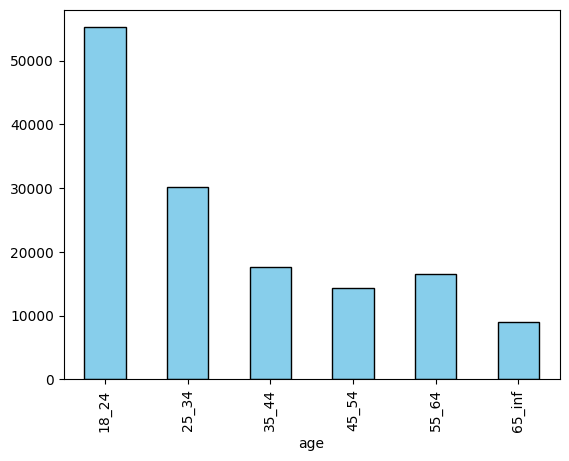

In [117]:
age_counts = users['age'].value_counts().sort_index()
print(age_counts)

age_counts.plot(kind='bar', color='skyblue', edgecolor='black')


sex
0.0    91991
1.0    44635
Name: count, dtype: int64


Text(0.5, 1.0, 'Распределение пользователей по полу')

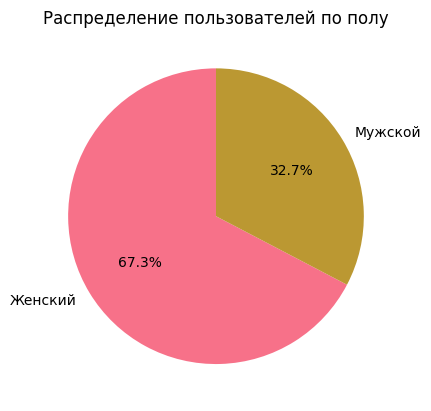

In [118]:
sex_counts = users['sex'].value_counts()
print(sex_counts)
sex_labels = ['Женский', 'Мужской']
sex_values = [sex_counts[0], sex_counts[1]]
plt.pie(sex_values, labels=sex_labels, autopct='%1.1f%%', startangle=90)
plt.title('Распределение пользователей по полу')

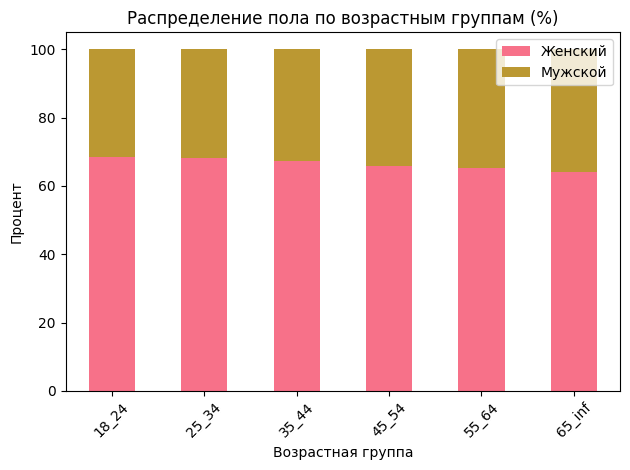

In [119]:
crosstab = pd.crosstab(users['age'], users['sex'], margins=True, normalize='index') * 100
crosstab_plot = crosstab.drop('All', axis=0, errors='ignore').drop('All', axis=1, errors='ignore')
crosstab_plot.plot(kind='bar', stacked=True)
plt.title('Распределение пола по возрастным группам (%)')
plt.xlabel('Возрастная группа')
plt.ylabel('Процент')
plt.legend(['Женский', 'Мужской'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

В целом хорошие данные которые можно использовать без предобработки

Нужно учесть:
- Дисбаланс по возрасту
- Дисбаланс по полу

In [120]:
users.head()

,user_id,age,sex
0,1,45_54,NaN
1,2,18_24,0.0
2,3,65_inf,0.0
3,4,18_24,0.0
4,5,35_44,0.0


### Items

In [121]:
items.shape

(59599, 5)

In [122]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59599 entries, 0 to 59598
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       59599 non-null  int64 
 1   title    59599 non-null  object
 2   genres   59568 non-null  object
 3   authors  52714 non-null  object
 4   year     46720 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.3+ MB


In [123]:
items.isnull().sum()

id             0
title          0
genres        31
authors     6885
year       12879
dtype: int64

In [124]:
print("проблемные значения в 'year':")
non_numeric_years = []
for value in items['year'].dropna().unique():
    try:
        int(str(value))
    except ValueError:
        non_numeric_years.append(value)

print(f"{len(non_numeric_years)} нечисловых значений")
for value in non_numeric_years[:10]:
    count = items[items['year'] == value].shape[0]
    print(f"'{value}': {count}")

проблемные значения в 'year':
768 нечисловых значений
'1829-1830': 1
'58-50 гг. до н. э.': 2
'1888-1891': 1
'1816-1829': 11
'1875-1880': 1
'1924-1927': 2
'1909-1915': 1
'1837-1838': 1
'1822-1824': 2
'1880-1881': 2


In [125]:
items_processed = items.copy()

items_processed['genres_list'] = items_processed['genres'].fillna('').apply(
    lambda x: [genre.strip() for genre in str(x).split(',') if genre.strip()]
)

items_processed['authors_list'] = items_processed['authors'].fillna('').apply(
    lambda x: [author.strip() for author in str(x).split(',') if author.strip()]
)

In [126]:
all_genres = []
for genres_list in items_processed['genres_list']:
    all_genres.extend(genres_list)

genre_counts = pd.Series(all_genres).value_counts()
print(f"уникальных жанров: {len(genre_counts)}")

all_authors = []
for authors_list in items_processed['authors_list']:
    all_authors.extend(authors_list)

author_counts = pd.Series(all_authors).value_counts()
print(f"уникальных авторов: {len(author_counts)}")

уникальных жанров: 640
уникальных авторов: 19310


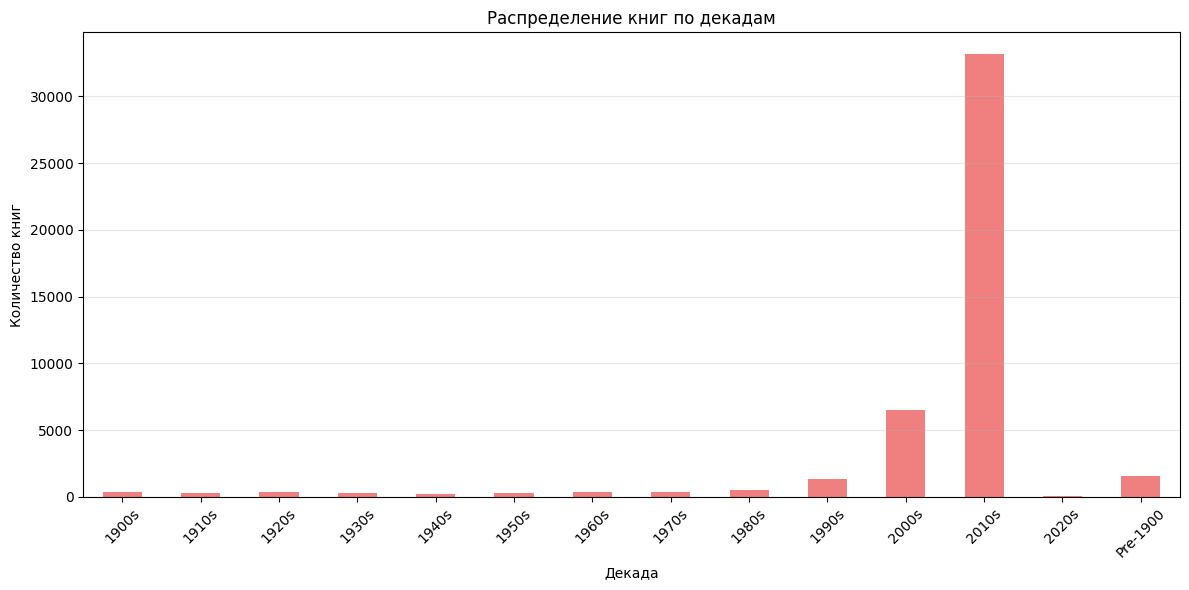

In [127]:
numeric_years = pd.to_numeric(items['year'], errors='coerce')
valid_years = numeric_years[(numeric_years >= 1800) & (numeric_years <= 2025)].dropna()

def get_decade(year):
    if year < 1900:
        return 'Pre-1900'
    else:
        return f'{int(year//10*10)}s'

decades = valid_years.apply(get_decade)
decade_counts = decades.value_counts().sort_index()
decade_counts.plot(kind='bar', color='lightcoral', figsize=(12, 6))
plt.title('Распределение книг по декадам')
plt.xlabel('Декада')
plt.ylabel('Количество книг')
plt.tick_params(axis='x', rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

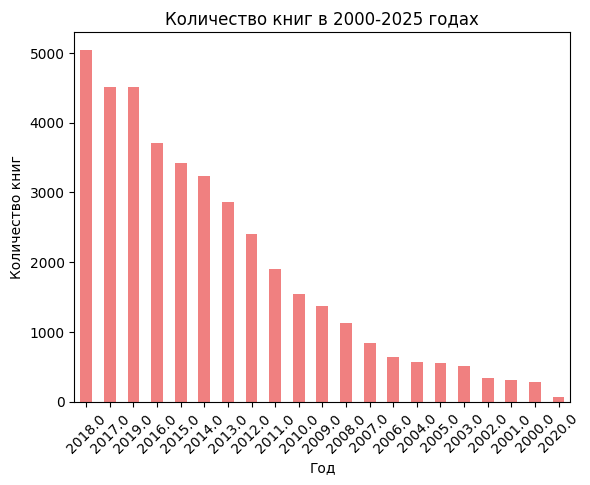

In [128]:
valid_years = numeric_years[(numeric_years >= 2000) & (numeric_years <= 2025)].dropna()
top_years = valid_years.value_counts()
top_years.plot(kind='bar', color='lightcoral')
plt.title('Количество книг в 2000-2025 годах')
plt.xlabel('Год')
plt.ylabel('Количество книг')
plt.tick_params(axis='x', rotation=45)

Text(0.5, 0, 'Количество книг')

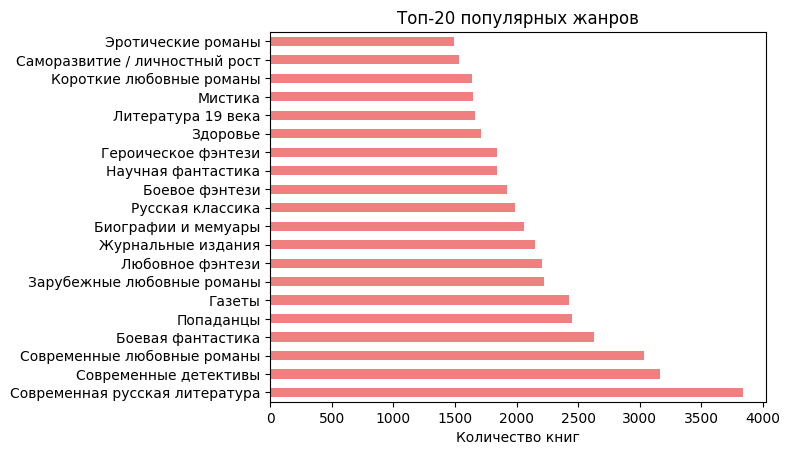

In [129]:
top_genres = pd.Series(all_genres).value_counts().head(20)
top_genres.plot(kind='barh', color='lightcoral')
plt.title('Топ-20 популярных жанров')
plt.xlabel('Количество книг')

In [130]:
def clean_year(year_value):
    if pd.isna(year_value):
        return np.nan
    
    year_str = str(year_value).strip()
    
    if not year_str:
        return np.nan
    
    try:
        year_num = int(float(year_str))
        if year_num <= 2025:
            return year_num
        else:
            return np.nan
    except ValueError:
        return np.nan

items_processed['year_clean'] = items['year'].apply(clean_year)

print(f"Исходных значений: {len(items)}")
print(f'Исходных пропусков: {items["year"].isna().sum()}')
print(f"Значений после очистки: {items_processed['year_clean'].notna().sum()}")
print(f"Пропусков стало: {items_processed['year_clean'].isna().sum()}")
print(f"Процент пропусков: {items_processed['year_clean'].isna().sum() / len(items) * 100:.1f}%")

Исходных значений: 59599
Исходных пропусков: 12879
Значений после очистки: 45835
Пропусков стало: 13764
Процент пропусков: 23.1%


- Обработаны данные для колонок genres, authors.
- Проблема с годами: 768 значений которые нельзя преобразовать в числовые ('1829-1830'  и тп) и 12879 null ~ 23% пропусков
- Книги в основном после 2000х

In [131]:
items_processed.head()

,id,title,genres,authors,year,genres_list,authors_list,year_clean
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886,"[Зарубежные детские книги, Сказки, Зарубежная ...",[Михаил Салтыков-Щедрин],1886.0
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894,"[Классическая проза, Литература 19 века, Русск...",[Антон Чехов],1894.0
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869,"[Зарубежная классика, Классическая проза, Лите...",[Михаил Салтыков-Щедрин],1869.0
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831,"[Пьесы и драматургия, Литература 19 века]",[Михаил Лермонтов],1831.0
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873,"[Зарубежная классика, Классическая проза, Лите...",[Михаил Салтыков-Щедрин],1873.0


### Interactions

In [132]:
interactions.shape

(1533078, 5)

In [133]:
interactions.head()

,user_id,item_id,progress,rating,start_date
0,126706,14433,80,NaN,2018-01-01
1,127290,140952,58,NaN,2018-01-01
2,66991,198453,89,NaN,2018-01-01
3,46791,83486,23,5.0,2018-01-01
4,79313,188770,88,5.0,2018-01-01


In [134]:
interactions.isnull().sum()

user_id             0
item_id             0
progress            0
rating        1247722
start_date          0
dtype: int64

In [135]:
print("уникальные значения")
for col in interactions.columns:
    print(f"{col}: {interactions[col].nunique()}")

уникальные значения
user_id: 151600
item_id: 59599
progress: 101
rating: 5
start_date: 730


In [136]:
interactions_processed = interactions.copy()
interactions_processed['start_date_dt'] = pd.to_datetime(interactions_processed['start_date'])
print(f"диапазон дат: {interactions_processed['start_date_dt'].min()} - {interactions_processed['start_date_dt'].max()}")

диапазон дат: 2018-01-01 00:00:00 - 2019-12-31 00:00:00


In [137]:
# new features
interactions_processed['start_year'] = interactions_processed['start_date_dt'].dt.year
interactions_processed['start_month'] = interactions_processed['start_date_dt'].dt.month
interactions_processed['start_day_of_week'] = interactions_processed['start_date_dt'].dt.dayofweek
interactions_processed['start_quarter'] = interactions_processed['start_date_dt'].dt.quarter

count    1.533078e+06
mean     4.765807e+01
std      3.835227e+01
min      0.000000e+00
25%      7.000000e+00
50%      4.400000e+01
75%      8.900000e+01
max      1.000000e+02
Name: progress, dtype: float64
progress
0      200923
1       48358
2       33918
3       26329
4       22347
        ...  
96      10289
97      11132
98      13848
99      56711
100    228240
Name: count, Length: 101, dtype: int64
average progress: 47.7%


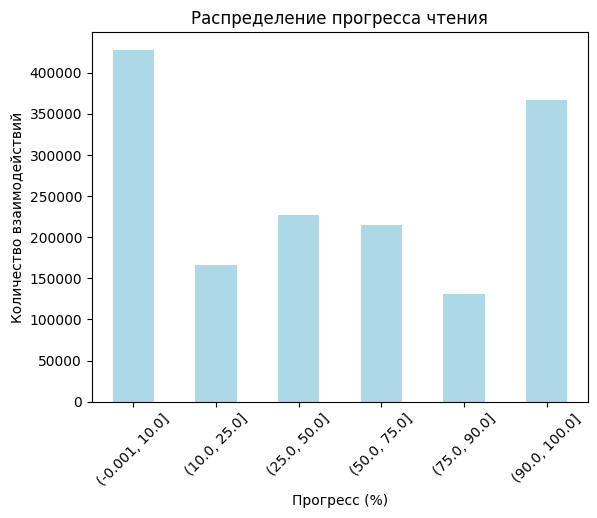

In [138]:
print(interactions_processed['progress'].describe())
progress_distribution = interactions_processed['progress'].value_counts().sort_index()
print(progress_distribution)
print(f"average progress: {interactions_processed['progress'].mean():.1f}%")
progress_bins = [0, 10, 25, 50, 75, 90, 100]
progress_binned = pd.cut(interactions_processed['progress'], bins=progress_bins, include_lowest=True)
progress_binned.value_counts().sort_index().plot(kind='bar', color='lightblue')
plt.title('Распределение прогресса чтения')
plt.xlabel('Прогресс (%)')
plt.ylabel('Количество взаимодействий')
plt.tick_params(axis='x', rotation=45)

rating
1.0      6116
2.0      5864
3.0     18274
4.0     40386
5.0    214716
Name: count, dtype: int64
Percent of rated books: 18.6%


Text(0, 0.5, 'Количество оценок')

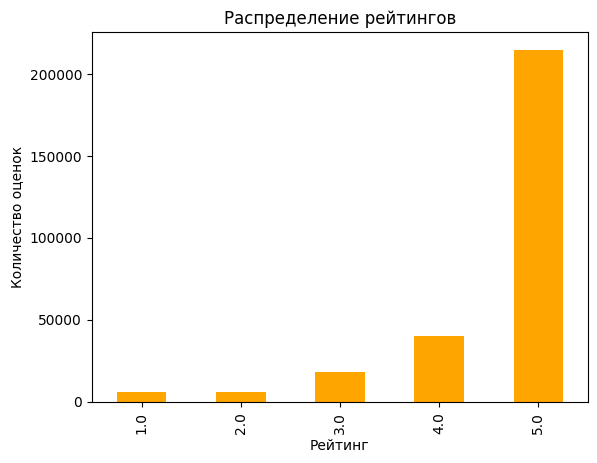

In [139]:
rating_counts = interactions_processed['rating'].value_counts().sort_index()
print(rating_counts)
print(f"Percent of rated books: {interactions_processed['rating'].notna().sum() / len(interactions_processed) * 100:.1f}%")
rating_counts.plot(kind='bar', color='orange')
plt.title('Распределение рейтингов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество оценок')

([<matplotlib.axis.XTick at 0x35233bbb0>,
 [Text(0, 0, 'Янв'),
  Text(1, 0, 'Фев'),
  Text(2, 0, 'Мар'),
  Text(3, 0, 'Апр'),
  Text(4, 0, 'Май'),
  Text(5, 0, 'Июн'),
  Text(6, 0, 'Июл'),
  Text(7, 0, 'Авг'),
  Text(8, 0, 'Сен'),
  Text(9, 0, 'Окт'),
  Text(10, 0, 'Ноя'),
  Text(11, 0, 'Дек')])

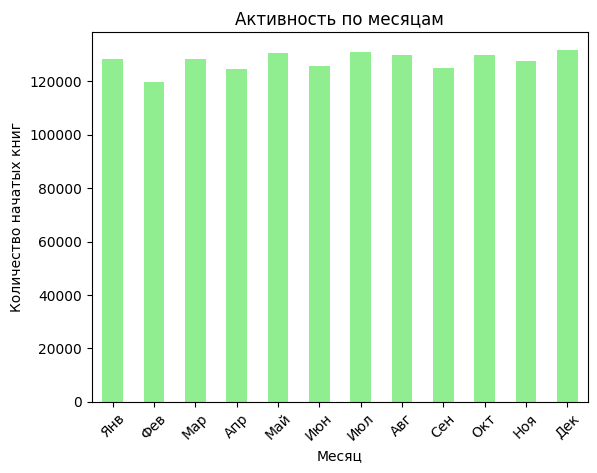

In [140]:
month_counts = interactions_processed['start_month'].value_counts().sort_index()
month_names = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 
               'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
month_counts.plot(kind='bar', color='lightgreen')
plt.title('Активность по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество начатых книг')
plt.xticks(ticks=range(len(month_names)), labels=month_names, rotation=45)

([<matplotlib.axis.XTick at 0x3523e3280>,
 [Text(0, 0, 'Пн'),
  Text(1, 0, 'Вт'),
  Text(2, 0, 'Ср'),
  Text(3, 0, 'Чт'),
  Text(4, 0, 'Пт'),
  Text(5, 0, 'Сб'),
  Text(6, 0, 'Вс')])

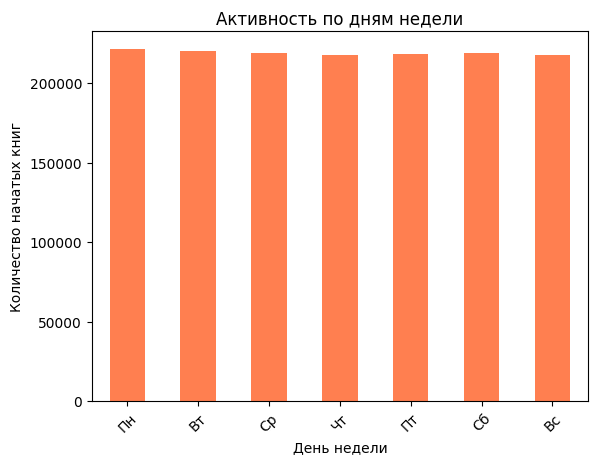

In [141]:
day_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
day_counts = interactions_processed['start_day_of_week'].value_counts().sort_index()
day_counts.plot(kind='bar', color='coral')
plt.title('Активность по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество начатых книг')
plt.xticks(ticks=range(len(day_names)), labels=day_names, rotation=45)

Text(0, 0.5, 'Количество начатых книг')

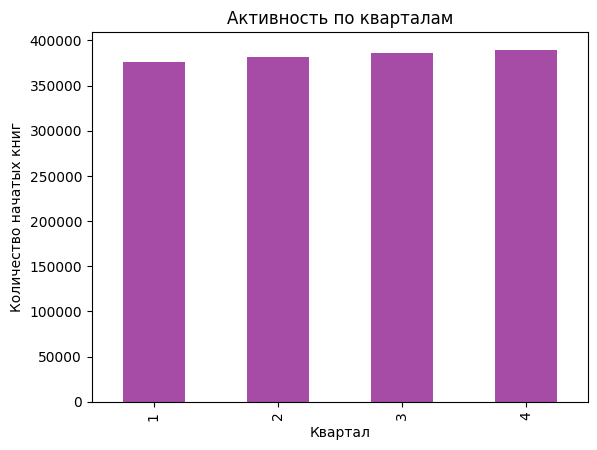

In [142]:
quarter_counts = interactions_processed['start_quarter'].value_counts().sort_index()
quarter_counts.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Активность по кварталам')
plt.xlabel('Квартал')
plt.ylabel('Количество начатых книг')

Text(0, 0.5, 'Средний прогресс (%)')

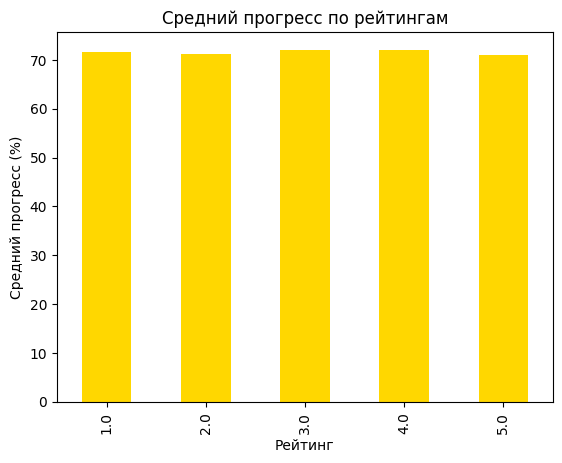

In [143]:
progress_rating = interactions_processed[interactions_processed['rating'].notna()]
progress_means = progress_rating.groupby('rating')['progress'].mean()
progress_means.plot(kind='bar', color='gold')
plt.title('Средний прогресс по рейтингам')
plt.xlabel('Рейтинг')
plt.ylabel('Средний прогресс (%)')

In [144]:
interactions_final = interactions_processed.copy()

In [146]:
rated_data = interactions_final[interactions_final['rating'].notna()].copy()

overall_correlation = rated_data['progress'].corr(rated_data['rating'])
print(f"Общая корреляция прогресс-рейтинг: {overall_correlation:.4f}")

Общая корреляция прогресс-рейтинг: -0.0077


In [147]:
# new features - progress categories, is_weekend, season
interactions_final = interactions_processed.copy()

def categorize_progress(progress):
    if progress == 0:
        return 'not_started'
    elif progress < 25:
        return 'barely_started'
    elif progress < 50:
        return 'quarter_read'
    elif progress < 75:
        return 'half_read'
    elif progress < 100:
        return 'almost_finished'
    else:
        return 'completed'

interactions_final['progress_category'] = interactions_final['progress'].apply(categorize_progress)


interactions_final['is_weekend'] = interactions_final['start_day_of_week'].isin([5, 6]).astype(int)
interactions_final['season'] = interactions_final['start_month'].map({
    12: 'winter', 1: 'winter', 2: 'winter',
    3: 'spring', 4: 'spring', 5: 'spring',
    6: 'summer', 7: 'summer', 8: 'summer',
    9: 'autumn', 10: 'autumn', 11: 'autumn'
})

In [148]:
interactions_final

,user_id,item_id,progress,rating,start_date,start_date_dt,start_year,start_month,start_day_of_week,start_quarter,progress_category,is_weekend,season
0,126706,14433,80,NaN,2018-01-01,2018-01-01,2018,1,0,1,almost_finished,0,winter
1,127290,140952,58,NaN,2018-01-01,2018-01-01,2018,1,0,1,half_read,0,winter
2,66991,198453,89,NaN,2018-01-01,2018-01-01,2018,1,0,1,almost_finished,0,winter
3,46791,83486,23,5.0,2018-01-01,2018-01-01,2018,1,0,1,barely_started,0,winter
4,79313,188770,88,5.0,2018-01-01,2018-01-01,2018,1,0,1,almost_finished,0,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533073,76968,285394,95,NaN,2019-12-31,2019-12-31,2019,12,1,4,almost_finished,0,winter
1533074,153877,285394,76,5.0,2019-12-31,2019-12-31,2019,12,1,4,almost_finished,0,winter
1533075,90021,73789,97,NaN,2019-12-31,2019-12-31,2019,12,1,4,almost_finished,0,winter
1533076,6452,77993,39,NaN,2019-12-31,2019-12-31,2019,12,1,4,quarter_read,0,winter


- большое количество пропусков по рейтингу
- равномерное распределение "чтения" (на самом деле старта книг) по всем периодам (месяцам, дням недели и кварталам), никакой сезонности
- implicit feedback (почти нет рейтинга)
- прогресс чтения как индикатор интереса, но это не proxy рейтинга (учитывая нулевую коррелцию и равномерное распределение среднего прогресса относительно рейтингу)
- временные признаки (сезонные рекомендации)
- дисбаланс между активными и пассивными пользователями

## Пайплайн предобработки данных

На основе проведенного EDA создадим единый пайплайн для предобработки всех данных.

In [106]:
def preprocess_items(items_df):
    
    items_processed = items_df.copy()

    items_processed['genres_list'] = items_processed['genres'].fillna('').apply(
        lambda x: [genre.strip() for genre in str(x).split(',') if genre.strip() and genre.strip() != 'nan']
    )
    
    items_processed['authors_list'] = items_processed['authors'].fillna('').apply(
        lambda x: [author.strip() for author in str(x).split(',') if author.strip() and author.strip() != 'nan']
    )
    
    def clean_year(year_value):
        if pd.isna(year_value):
            return np.nan
        
        year_str = str(year_value).strip()
        
        if not year_str:
            return np.nan
        
        try:
            year_num = int(float(year_str))
            if year_num <= 2025:
                return year_num
            else:
                return np.nan
        except ValueError:
            return np.nan
    
    items_processed['year_clean'] = items_processed['year'].apply(clean_year)
    
    
    return items_processed

In [111]:
def preprocess_interactions(interactions_df):
    
    interactions_processed = interactions_df.copy()
    
    interactions_processed['start_date_dt'] = pd.to_datetime(interactions_processed['start_date'])
    
    interactions_processed['start_year'] = interactions_processed['start_date_dt'].dt.year
    interactions_processed['start_month'] = interactions_processed['start_date_dt'].dt.month
    interactions_processed['start_day_of_week'] = interactions_processed['start_date_dt'].dt.dayofweek
    interactions_processed['start_quarter'] = interactions_processed['start_date_dt'].dt.quarter
    interactions_processed['is_weekend'] = interactions_processed['start_day_of_week'].isin([5, 6]).astype(int)
    
    def categorize_progress(progress):
        if progress == 0:
            return 'not_started'
        elif progress < 25:
            return 'barely_started'
        elif progress < 50:
            return 'quarter_read'
        elif progress < 75:
            return 'half_read'
        elif progress < 100:
            return 'almost_finished'
        else:
            return 'completed'
    
    interactions_processed['progress_category'] = interactions_processed['progress'].apply(categorize_progress)
    
    interactions_processed['season'] = interactions_processed['start_month'].map({
        12: 'winter', 1: 'winter', 2: 'winter',
        3: 'spring', 4: 'spring', 5: 'spring',
        6: 'summer', 7: 'summer', 8: 'summer',
        9: 'autumn', 10: 'autumn', 11: 'autumn'
    })
    
    
    return interactions_processed